In [13]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
users_df = pd.read_csv('users.csv')
users_df.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [15]:
interactons_df = pd.read_csv('interactions.csv')
interactons_df.head()


,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250.0,72.0
1,699317,1659,2021-05-29,8317.0,100.0
2,656683,7107,2021-05-09,10.0,0.0
3,864613,7638,2021-07-05,14483.0,100.0
4,964868,9506,2021-04-30,6725.0,100.0


## Предварительная обработка  
Беру данные KION. Хочу проверить:  
1) процент мужчин/женщин не меняется от недели к неделе
2) суммарное время просмотра не меняется от недели к неделе

In [16]:
df = pd.merge(users_df, interactons_df, on='user_id')
print(df['user_id'].nunique(), df.shape)

448798 (1288997, 9)


In [17]:
df = df.drop(df[df['last_watch_dt'] == '20'].index)
df['last_watch_dt'].unique()


array(['2021-04-25', '2021-05-06', '2021-05-08', '2021-07-09',
       '2021-07-12', '2021-07-11', '2021-07-14', '2021-07-10',
       '2021-07-02', '2021-07-03', '2021-08-09', '2021-06-29',
       '2021-07-01', '2021-07-08', '2021-08-20', '2021-04-19',
       '2021-06-23', '2021-07-07', '2021-08-03', '2021-08-04',
       '2021-05-27', '2021-06-02', '2021-07-21', '2021-03-16',
       '2021-07-30', '2021-08-01', '2021-04-05', '2021-04-04',
       '2021-04-09', '2021-06-13', '2021-05-03', '2021-03-27',
       '2021-07-15', '2021-07-27', '2021-08-14', '2021-08-12',
       '2021-07-25', '2021-08-13', '2021-07-29', '2021-08-17',
       '2021-08-02', '2021-07-31', '2021-06-10', '2021-06-09',
       '2021-08-10', '2021-04-26', '2021-04-23', '2021-06-21',
       '2021-04-21', '2021-06-24', '2021-08-21', '2021-04-18',
       '2021-05-15', '2021-07-16', '2021-06-14', '2021-03-22',
       '2021-04-17', '2021-04-16', '2021-04-12', '2021-03-25',
       '2021-07-19', '2021-07-18', '2021-04-22', '2021-

In [18]:
df['last_watch_dt'] = pd.to_datetime(df['last_watch_dt'])


df['week_last_watch'] = df['last_watch_dt'].dt.isocalendar().week
df['week_last_watch'].unique()

<IntegerArray>
[16, 18, 27, 28, 26, 32, 33, 25, 31, 21, 22, 29, 11, 30, 14, 13, 23, 12, 17,
 15, 19, 24, 20, 10]
Length: 24, dtype: UInt32

In [19]:
df = df.dropna(subset=['sex'])
df

,user_id,age,income,sex,kids_flg,item_id,last_watch_dt,total_dur,watched_pct,week_last_watch
0,973171,age_25_34,income_60_90,М,1,12204,2021-04-25,7361.0,100.0,16
1,973171,age_25_34,income_60_90,М,1,5471,2021-05-06,91345.0,16.0,18
2,973171,age_25_34,income_60_90,М,1,218,2021-05-08,160564.0,89.0,18
3,962099,age_18_24,income_20_40,М,0,9561,2021-07-09,4676.0,82.0,27
4,962099,age_18_24,income_20_40,М,0,11245,2021-07-12,20132.0,83.0,28
...,...,...,...,...,...,...,...,...,...,...
1288991,950528,age_35_44,income_20_40,М,1,7310,2021-07-29,765.0,13.0,30
1288992,1021167,age_65_inf,income_20_40,Ж,0,3959,2021-07-18,103.0,0.0,28
1288993,312839,age_65_inf,income_60_90,Ж,0,11987,2021-07-17,117.0,2.0,28
1288994,191349,age_45_54,income_40_60,М,1,4702,2021-07-21,3466.0,57.0,29


In [20]:
grouped_df = df.groupby(['week_last_watch', 'sex'], as_index=False).aggregate({'sex': 'count'}).rename(columns={'sex': 'count'})
grouped_df

,week_last_watch,count
0,10,3377
1,10,4366
2,11,10751
3,11,13190
4,12,11172
5,12,13298
6,13,10795
7,13,13269
8,14,10993
9,14,13419


Предположим с 10 по 13 неделю мы собирали данные и строили модель, а с 14 по 33 неделю модель функционировала

Считаем все статистики необходимые для ttest

In [21]:
old_data = grouped_df[grouped_df['week_last_watch'] < 14]

old_count = old_data['count'].sum()
old_womans_data = old_data[old_data.index % 2 == 0]
old_womans_mean = old_womans_data['count'].sum() / old_count
old_womans_var = (1-old_womans_mean) * old_womans_data['count'].sum() / (old_count - 1)

old_data

,week_last_watch,count
0,10,3377
1,10,4366
2,11,10751
3,11,13190
4,12,11172
5,12,13298
6,13,10795
7,13,13269


Теперь предполагается что модель функционирует и каждую неделю мы делаем ttest для того чтобы проверить, что процент женщин остается прежним


In [22]:
from math import sqrt
new_data = grouped_df[grouped_df['week_last_watch'] >= 14]


for week in new_data['week_last_watch'].unique():
    week_data = grouped_df[grouped_df['week_last_watch'] == week]

    week_sz = week_data['count'].sum()
    week_womans_count = week_data.iloc[0]['count']
    womans_week_percent = week_womans_count / week_sz

    womans_week_var = (1 - womans_week_percent) * week_womans_count / (week_sz - 1)
    test = st.ttest_ind_from_stats(womans_week_percent,sqrt(womans_week_var), week_sz, old_womans_mean, sqrt(old_womans_var), old_count)

    print(f'number_week: {week}')
    print(f'womans_week_percent: {womans_week_percent}, old_womans_percent: {old_womans_mean}')
    print(test)

    if test[1] < 0.05:
        print('dq check failed')
    else:
        print('dq check passed')
    print()


number_week: 14
womans_week_percent: 0.45031132230050797, old_womans_percent: 0.449961355306789
Ttest_indResult(statistic=0.09623677587088361, pvalue=0.9233327077477207)
dq check passed

number_week: 15
womans_week_percent: 0.45047501384569505, old_womans_percent: 0.449961355306789
Ttest_indResult(statistic=0.13913155516634684, pvalue=0.8893464635092372)
dq check passed

number_week: 16
womans_week_percent: 0.44036720642611243, old_womans_percent: 0.449961355306789
Ttest_indResult(statistic=-3.132000282520002, pvalue=0.001736616191318123)
dq check failed

number_week: 17
womans_week_percent: 0.4486164458728541, old_womans_percent: 0.449961355306789
Ttest_indResult(statistic=-0.43518671202389514, pvalue=0.6634276995821289)
dq check passed

number_week: 18
womans_week_percent: 0.45462212434990396, old_womans_percent: 0.449961355306789
Ttest_indResult(statistic=1.563255635805269, pvalue=0.11799505339622055)
dq check passed

number_week: 19
womans_week_percent: 0.45276134379316635, old_wom

1) Видим, что для нашего датасета при таких размерах выборки и такой дисперсии даже отклонения в 1 процент недопустимы  
    Максимально допустимое отклонение от среднего в районе 0.8 - 0.9  
      
2) Начиная с 20 недели процент женщин стал сильно увеличиваться и по итогу с 44 дошел до 49.3  
  
3) Здесь как я понимаю не нужно делать поправку на pvalue или использовать множественную проверку гипотез, поскольку предполагается,  
    что данные поступают к нам последовательно, и каждую неделю мы проводим один тест. предполагается что данные независимы -> результаты прошлой проверки  никак не влияют на результаты следующей

Теперь для метрики watched_pct хотим проверить изменилось ли ее распределение  
Используем psi 

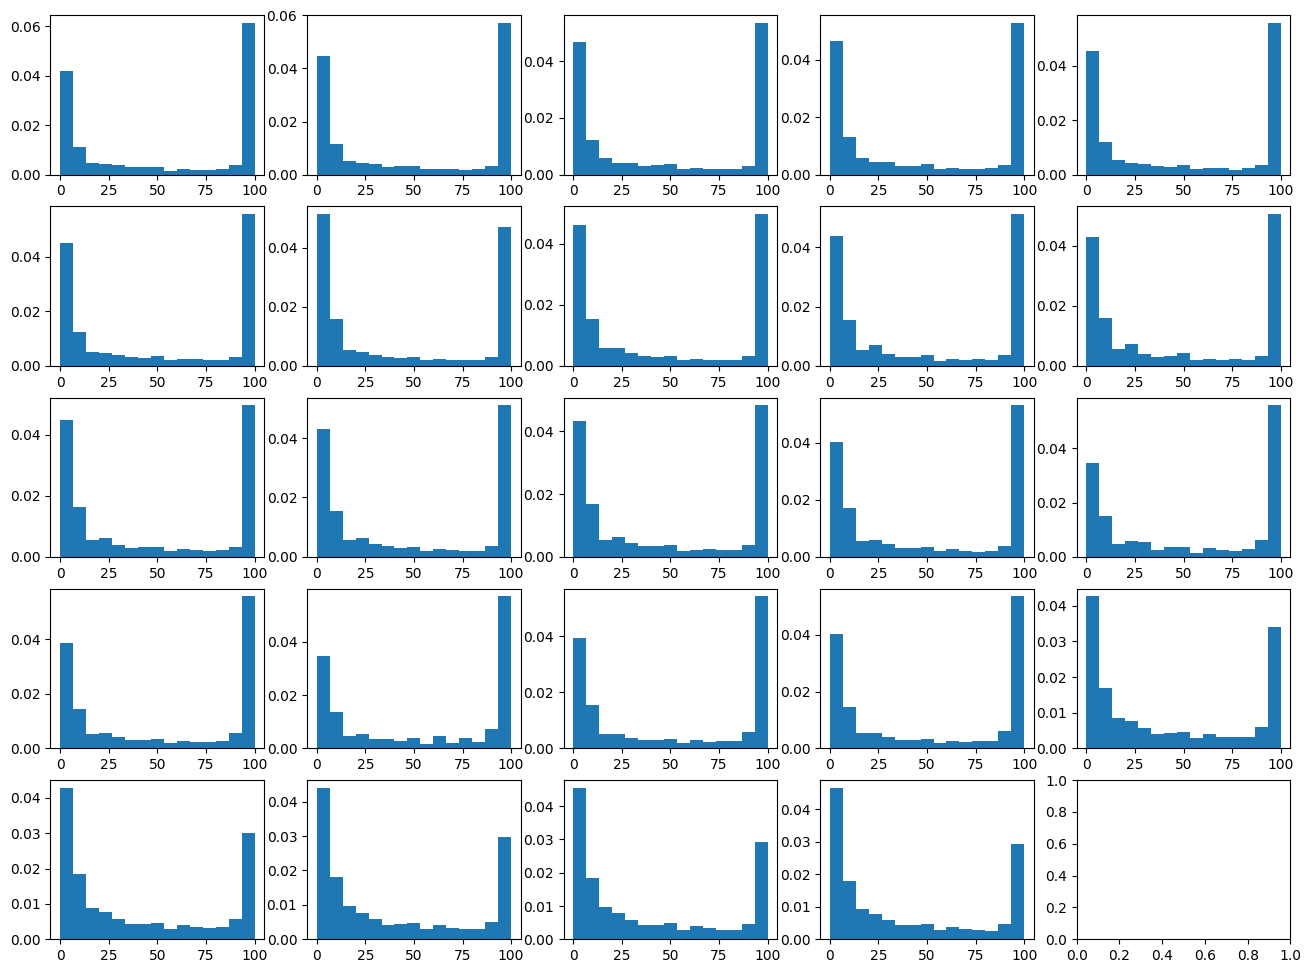

In [23]:
df_grouped_week = df.groupby('week_last_watch')
fig, axes = plt.subplots(nrows=5, ncols=5, figsize = (16, 12))


for group_ind in df_grouped_week.groups:

    row = (group_ind - 10) // 5
    column = (group_ind - 10) % 5
    group = df_grouped_week.get_group(group_ind)

    axes[row][column].hist(group['watched_pct'], bins = 15, density = True)    

(array([0.04197985, 0.0112747 , 0.00478497, 0.00432003, 0.00379698,
        0.00323518, 0.00313832, 0.00292522, 0.00164665, 0.00213096,
        0.00197598, 0.00168539, 0.00209221, 0.00368074, 0.06133282]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ]),
 array([0.27986569, 0.07516466, 0.03189978, 0.02880021, 0.02531319,
        0.02156787, 0.02092212, 0.01950149, 0.01097766, 0.01420638,
        0.01317319, 0.01123596, 0.01394808, 0.02453829, 0.40888544]))

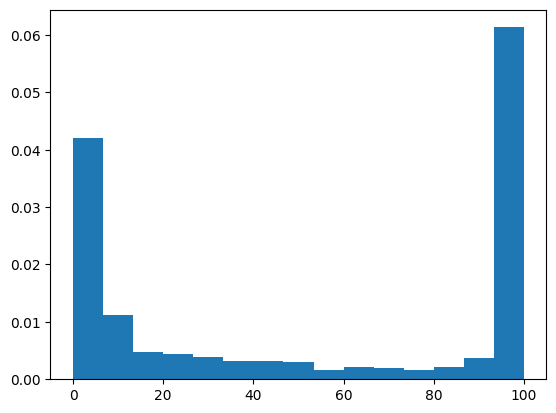

In [24]:
history_proba, history_ranges, _ = plt.hist(df_grouped_week.get_group(10)['watched_pct'], bins = 15, stacked=True, density=True)
history_proba, history_ranges, (history_proba * 20/3)

Также предполагаем, что первые 4 недели мы собирали данные о проценте просмотров, а затем каждую неделю используя psi сравниваем распределение процента просмотренности  
  
В ячейке ниже мы получаем эмпирические вероятности для процента просмотра за первые 4 недели (исторические данные)

(array([0.04567128, 0.01223799, 0.0055532 , 0.00424018, 0.00408681,
        0.00302256, 0.00314039, 0.00346958, 0.00196204, 0.00226692,
        0.00204808, 0.00179558, 0.00211542, 0.00323765, 0.05515231]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ]),
 array([0.27986569, 0.07516466, 0.03189978, 0.02880021, 0.02531319,
        0.02156787, 0.02092212, 0.01950149, 0.01097766, 0.01420638,
        0.01317319, 0.01123596, 0.01394808, 0.02453829, 0.40888544]))

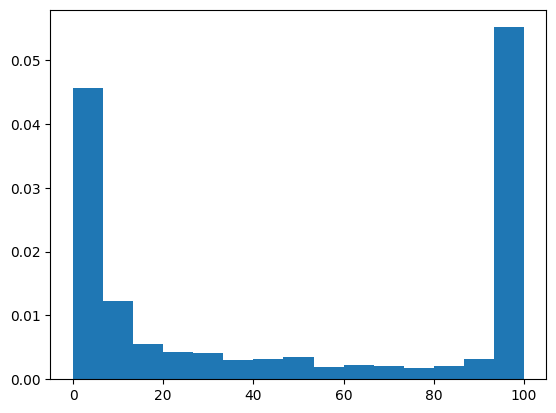

In [25]:
history_pdf, history_ranges, _ = plt.hist(np.hstack([df_grouped_week.get_group(group_ind)['watched_pct'].values for group_ind in list(df_grouped_week.groups.keys())[:4]]), \
                                             bins = 15, density=True)
history_probas = history_proba * history_ranges[1]
history_pdf, history_ranges, history_probas

In [27]:
for week in list(df_grouped_week.groups.keys())[4:]:
    week_pdf, week_ranges, _ = plt.hist(df_grouped_week.get_group(week)['watched_pct'], bins = 15, density=True)
    week_probas = week_pdf * week_ranges[1]
    
    psi = st.entropy(history_probas, week_probas) + st.entropy(history_probas, week_probas)
    
    print(f'week : {week}')
    print(f'psi: {psi}')
    
    if psi < 0.1:
        print('The watched pct hasn’t changed')
    elif psi >= 0.1 and psi < 0.2:
        print('The watched pct has slightly changed')
    else:
        print('The changes in watched pct are significant')

    print()
    plt.close()

week : 14
psi: 0.007907227992410268
The watched pct hasn’t changed

week : 15
psi: 0.008488357445147879
The watched pct hasn’t changed

week : 16
psi: 0.05092699916314014
The watched pct hasn’t changed

week : 17
psi: 0.0338260119059115
The watched pct hasn’t changed

week : 18
psi: 0.03166359008321193
The watched pct hasn’t changed

week : 19
psi: 0.03766995095158093
The watched pct hasn’t changed

week : 20
psi: 0.036985438415211125
The watched pct hasn’t changed

week : 21
psi: 0.02903398759866288
The watched pct hasn’t changed

week : 22
psi: 0.04458886888825317
The watched pct hasn’t changed

week : 23
psi: 0.029697004882861977
The watched pct hasn’t changed

week : 24
psi: 0.04448681568728473
The watched pct hasn’t changed

week : 25
psi: 0.021404755385412796
The watched pct hasn’t changed

week : 26
psi: 0.05244235195294404
The watched pct hasn’t changed

week : 27
psi: 0.028118376672820813
The watched pct hasn’t changed

week : 28
psi: 0.025332243868047777
The watched pct hasn’

C 14 по 28 неделю psi очень мал и никаких существенных изменений в watched_pct не наблюдается, с 29 по 33 неделю 0.1 < psi < 0.2 и некоторые изменения наблюдаются  
  
Такие результаты согласуются с гистограммой, видно что с 29 недели почему то сильно вырос процент пользователей с очень низким процентом просмотра (первый бин)  
и упало кол во пользователей с высоким процентом просмотра (последний бин)

Теперь попробуем реализовать adversarial validation, условия разделения остаются прежними  
  
Будем последовательно обучать классификатор отличать данные из новой недели, от исторических данных  
Плюс такого подхода в том что мы можем глобально сравнить изменения всех фичей, не прибегая к множественной проверке гипотез

In [ ]:
df['target'] = (df['week_last_watch'] < 14).astype(int)
df

,user_id,age,income,sex,kids_flg,item_id,last_watch_dt,total_dur,watched_pct,week_last_watch,target
0,973171,age_25_34,income_60_90,М,1,12204,2021-04-25,7361.0,100.0,16,0
1,973171,age_25_34,income_60_90,М,1,5471,2021-05-06,91345.0,16.0,18,0
2,973171,age_25_34,income_60_90,М,1,218,2021-05-08,160564.0,89.0,18,0
3,962099,age_18_24,income_20_40,М,0,9561,2021-07-09,4676.0,82.0,27,0
4,962099,age_18_24,income_20_40,М,0,11245,2021-07-12,20132.0,83.0,28,0
...,...,...,...,...,...,...,...,...,...,...,...
1288991,950528,age_35_44,income_20_40,М,1,7310,2021-07-29,765.0,13.0,30,0
1288992,1021167,age_65_inf,income_20_40,Ж,0,3959,2021-07-18,103.0,0.0,28,0
1288993,312839,age_65_inf,income_60_90,Ж,0,11987,2021-07-17,117.0,2.0,28,0
1288994,191349,age_45_54,income_40_60,М,1,4702,2021-07-21,3466.0,57.0,29,0


In [ ]:
history_df = df[df['week_last_watch'] < 14]
history_data = history_df[['age', 'income', 'sex', 'total_dur', 'watched_pct']]
history_target = history_df['target']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

На каждой новой неделе пытаемся обучить классификатор различать новую неделю и исторические данные  

In [ ]:
numeric_features = ['total_dur', 'watched_pct']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['age', 'income', 'sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
])

model = XGBClassifier()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

for week in list(df_grouped_week.groups.keys())[4:]:
    week_inf = df_grouped_week.get_group(week)
    week_data = week_inf[['age', 'income', 'sex', 'total_dur', 'watched_pct']]
    week_target = week_inf['target']

    data = pd.concat([history_data, week_data], ignore_index=True)
    target = pd.concat([history_target, week_target], ignore_index=True)

    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)
    pipeline.fit(X_train, y_train)
    prediction = pipeline.predict(X_test)

    print(f'week: {week}')
    print(f'roc_auc_score: {roc_auc_score(y_test, prediction)} \n')


week: 14
roc_auc_score: 0.5001205462119687 

week: 15
roc_auc_score: 0.500763853874688 

week: 16
roc_auc_score: 0.5234260277097856 

week: 17
roc_auc_score: 0.5231257903451685 

week: 18
roc_auc_score: 0.5374783120285912 

week: 19
roc_auc_score: 0.5381936139650363 

week: 20
roc_auc_score: 0.5376590132138507 

week: 21
roc_auc_score: 0.536184496985846 

week: 22
roc_auc_score: 0.5586931308226397 

week: 23
roc_auc_score: 0.5600717317309034 

week: 24
roc_auc_score: 0.6019948053660868 

week: 25
roc_auc_score: 0.5732123543018378 

week: 26
roc_auc_score: 0.6047326284983463 

week: 27
roc_auc_score: 0.5818029478979332 

week: 28
roc_auc_score: 0.5873097279655519 

week: 29
roc_auc_score: 0.6171619198888451 

week: 30
roc_auc_score: 0.6228119468909946 

week: 31
roc_auc_score: 0.6220407143940044 

week: 32
roc_auc_score: 0.6208262495457395 

week: 33
roc_auc_score: 0.6168366860399597 



Здесь мне непонятно, каким должно быть отклонение от 0.5 чтобы сказать что эффект стат значим.  
  
Я бы наверно определил как +5 процентов, но это ничем не обоснованно.  
  
Видим что по прежнему лучше всего отличаются данные с 29 по 33 неделю (10 - 12 процентов), однако данные с 22 по 29 также довольно сильно отличаются (5 - 10 процентов)